In [12]:
## Generic Function for plotting time complexity

import timeit
import matplotlib.pyplot as plt
import numpy as np
def plot_time_complexity(func, input_data, title, degree=2):
    # Initialize lists to store input sizes and corresponding computation times
    input_sizes = []
    computation_times = []

    for index, data in enumerate(input_data):
        # Measure the time taken to execute the function with the given input data
        time_taken = timeit.timeit(lambda: func(data), number=1000)
        print(f"\rTiming {index+1}th element", end='', flush=True)
        # Store input size and corresponding computation time
        input_sizes.append(len(str(data)))
        computation_times.append(time_taken)

    print("\n Timing done. Fitting started.\n")
    # Fit a polynomial curve to the data
    coefficients = np.polyfit(input_sizes, computation_times, degree)
    polynomial = np.poly1d(coefficients)
    fitted_curve = polynomial(input_sizes)

    # Plot the results
    plt.plot(input_sizes, computation_times, marker='o', label='Actual Data', color='#8FB0CE')
    plt.plot(input_sizes, fitted_curve, label=f'Fitted Curve (Degree {degree})', color="#3E4C59")
    plt.title(title)
    plt.xlabel('Input Size (Number of Digits)')
    plt.ylabel('Computation Time (seconds)')
    plt.legend()
    plt.show()


In [4]:
import random
import sys

def generate_random_input_data(num_elements):
    input_data = []
    for i in range(1, num_elements + 1):
        # Generate a random number with (i+1) digits
        random_number = random.randint(10**i, 10**(i + 1) - 1)
        input_data.append(random_number)

        # Print progress message without a newline, flush the output, and flush the standard output
        print(f"\rGenerating {i}th element", end='', flush=True)
        sys.stdout.flush()

    print("\nGeneration complete.")
    return input_data

Problem 1
---
Develop a program that efficiently determines the next higher permutation of a positive integer represented as a list of decimal digits. The next higher permutation is defined as the smallest integer greater than the given integer, while maintaining the same set of digits. Ensure that the program returns the result as a list of decimal digits. This task requires a careful consideration of algorithmic efficiency and precision in handling digit permutations, elevating the difficulty level of the problem. For example, the next higher permutation of 123542 is 124235.

In [5]:
def next_permutation(nums):
    # Find the first element from the right that is smaller than its next element
    i = len(nums) - 2
    while i >= 0 and nums[i] >= nums[i + 1]:
        i -= 1

    # If no such element is found, it means the given permutation is the highest
    if i == -1:
        return None

    # Find the smallest element to the right of 'i' that is greater than nums[i]
    j = len(nums) - 1
    while nums[j] <= nums[i]:
        j -= 1

    # Swap nums[i] and nums[j]
    nums[i], nums[j] = nums[j], nums[i]

    # Reverse the subarray to the right of 'i'
    nums[i + 1:] = reversed(nums[i + 1:])

    return nums

def find_next_permutation(number):
    # Convert the number to a list of digits
    nums = [int(digit) for digit in str(number)]

    # Find the next permutation
    next_perm = next_permutation(nums)

    # If the given permutation is already the highest, return None
    if next_perm is None:
        return None

    # Convert the list of digits back to an integer
    result = int(''.join(map(str, next_perm)))

    return result

# Example usage:
input_number = 123542
result = find_next_permutation(input_number)

if result is not None:
    print(f"The next higher permutation of {input_number} is {result}.")
else:
    print(f"{input_number} is already the highest permutation.")


The next higher permutation of 123542 is 124235.


In [6]:
input_data = generate_random_input_data(1000)
# plot_time_complexity(find_next_permutation, input_data, 'Time Complexity of find_next_permutation')

Generating 1000th element
Generation complete.


Timing 999th element
 Timing done. Fitting started.



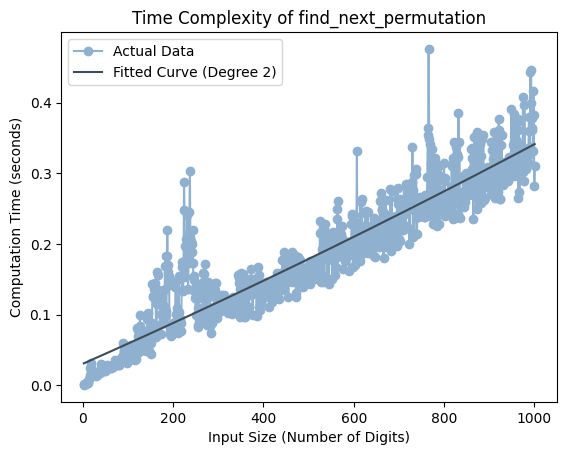

In [13]:
plot_time_complexity(find_next_permutation, input_data, 'Time Complexity of find_next_permutation')